In [ ]:
# 분류
  # k최근접 이웃
# 회귀
  # k최근접 이웃
  # 선형회귀 
    # 직선의 방정식의 문제점 - 곡선형태의 데이터를 수렴하지 못함 
      # 차수를 높인다.. 
        # 마냥 높이면 좋을까? --> over fit(과한학습으로 인해 검증데이터의 성능저하 )  
          # 규제 알고리즘  L1 / L2  
            # 차수를 높은 데이터를 규제알고리즘을 통해 최상의 결과를 도출

In [ ]:
# 분류, 예측

In [ ]:
# 필요한 라이브러리 로드
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

In [ ]:
# 데이터셋 로드
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
df = pd.DataFrame(X,columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#  학습용과 테스트용
from sklearn.model_selection import train_test_split
# 데이터를넘파이로 변경 차수는 2차원
x_train,x_test,y_train,y_test =  train_test_split(X,y,random_state=42)

In [ ]:
# 1차 방정식의 결과
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.519034189167905, 0.4849058889476756)

In [ ]:
# 2차원
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly,y_train)
lr.score(x_train_poly,y_train), lr.score(x_test_poly,y_test)

(0.022665633956886144, -0.1396286271210294)

In [ ]:
X = df['age'].values
x_train,x_test,y_train,y_test =  train_test_split(X.reshape(-1,1),y,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.039216394800697496, 0.008637038226036675)

In [ ]:
import seaborn as sns
df['target'] = y
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## 
url = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/diabetes.csv'

In [ ]:
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 컬럼 정보
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

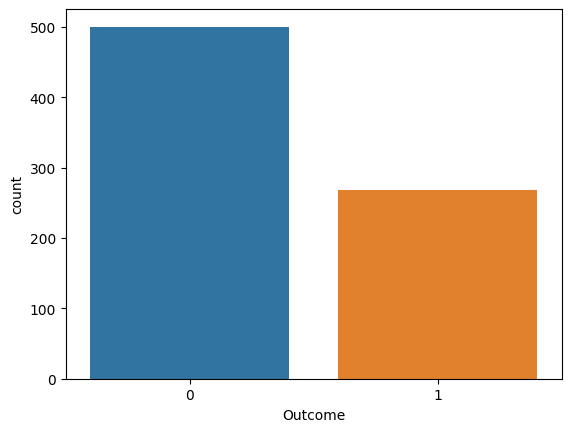

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Outcome',label='count')
plt.show()

In [ ]:
df_0 = df[df['Outcome']==0]
df_1 = df[df['Outcome']==1]

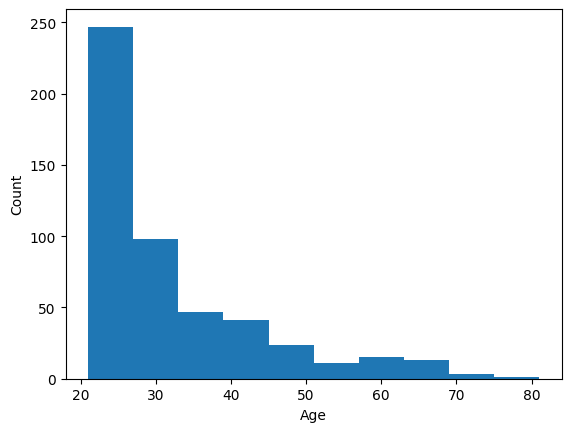

In [ ]:
# 나이에 대한 분포 - histogram
plt.hist(df_0['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


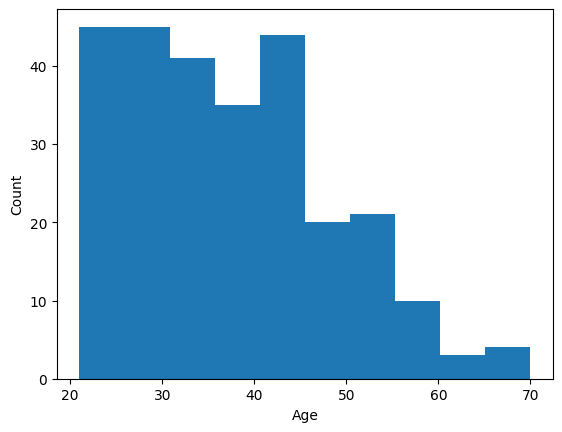

In [ ]:
# 나이에 대한 분포 - histogram
plt.hist(df_1['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

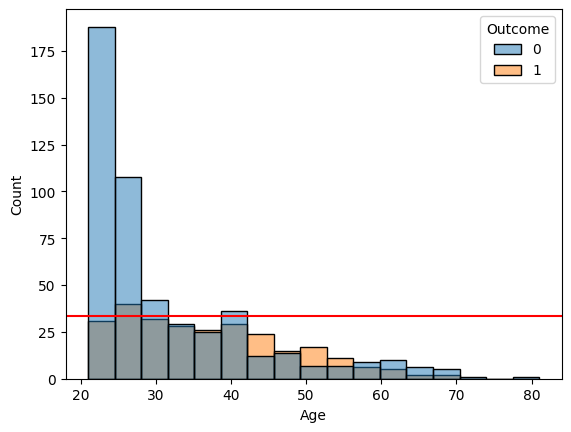

In [ ]:
sns.histplot(data=df, x='Age', hue = 'Outcome')
plt.axhline(np.mean(df['Age']), color='red', linestyle = 'solid' )
plt.show()

<Axes: >

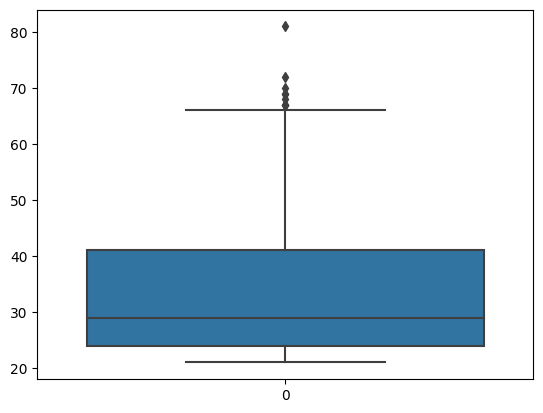

In [ ]:
sns.boxplot(df['Age'])

<Axes: xlabel='BMI', ylabel='Count'>

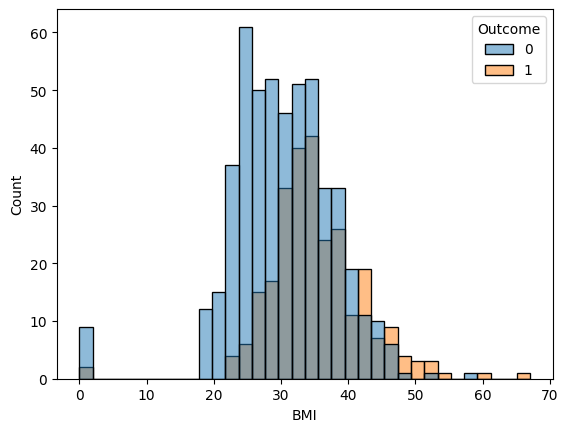

In [ ]:
sns.histplot(data=df, x='BMI', hue = 'Outcome')

<Axes: xlabel='Pregnancies', ylabel='Count'>

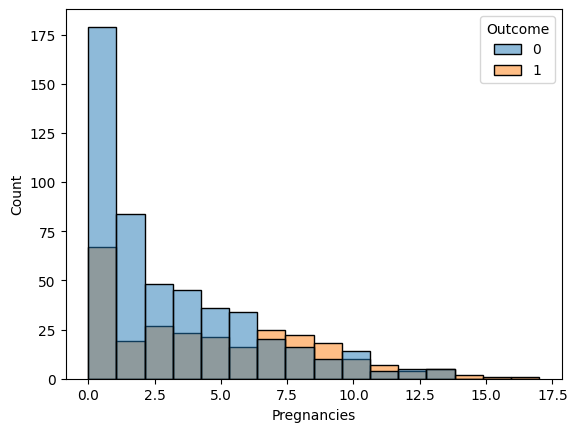

In [ ]:
df.columns
sns.histplot(data=df, x='Pregnancies', hue = 'Outcome')

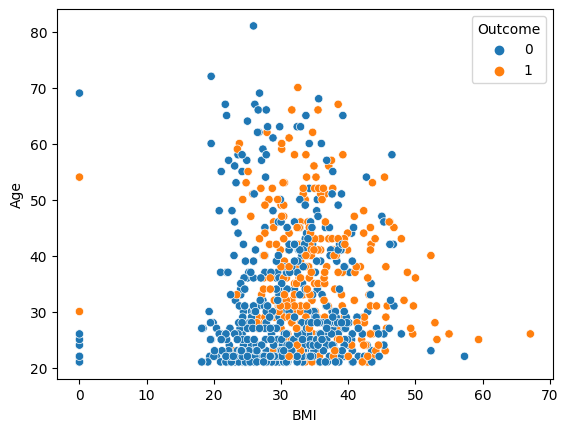

In [ ]:
# BMI AGE
sns.scatterplot(data=df, x='BMI', y='Age', hue='Outcome')
plt.show()

In [ ]:
# 타겟과 다른 특성과의 상관관계를 비교
correlation =  df.corr()['Outcome'].drop('Outcome')
sorted_correlation =  correlation.abs().sort_values(ascending=False)
sorted_correlation

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

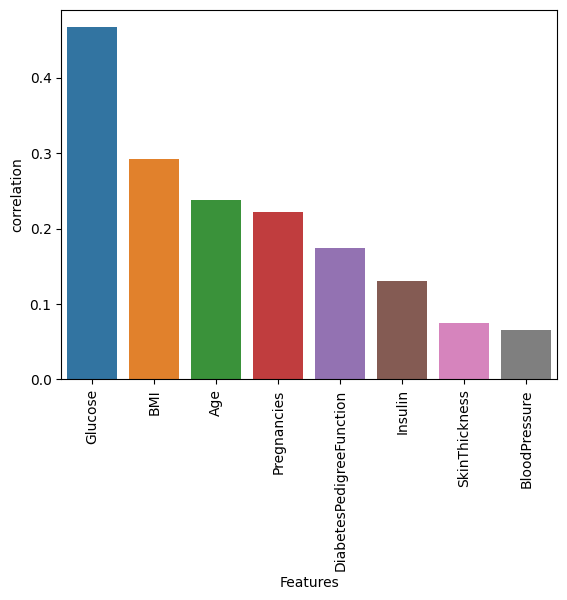

In [ ]:
sns.barplot(x= sorted_correlation.index, y = sorted_correlation)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('correlation')
plt.show()

In [ ]:
corr_ =  sorted_correlation[:4]
corr_

Glucose        0.466581
BMI            0.292695
Age            0.238356
Pregnancies    0.221898
Name: Outcome, dtype: float64

In [ ]:
# 전처리
list(corr_.index) + ['Outcome']
corr_df = df.loc[:, list(corr_.index) + ['Outcome']]
corr_df.head()

,Glucose,BMI,Age,Pregnancies,Outcome
0,148,33.6,50,6,1
1,85,26.6,31,1,0
2,183,23.3,32,8,1
3,89,28.1,21,1,0
4,137,43.1,33,0,1


<Axes: >

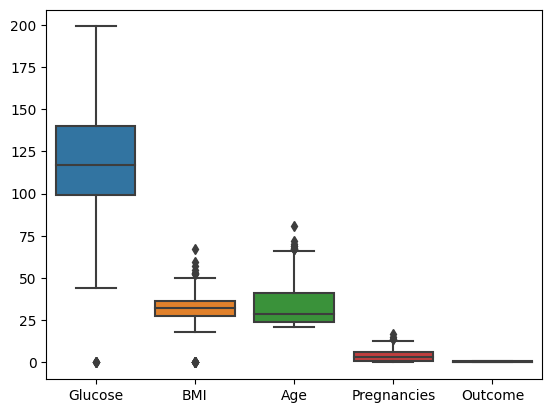

In [ ]:
sns.boxplot(corr_df)

In [ ]:
q1 = corr_df.quantile(0.25)
q3 = corr_df.quantile(0.75)
IQR = q3 - q1
IQR

Glucose        41.25
BMI             9.30
Age            17.00
Pregnancies     5.00
Outcome         1.00
dtype: float64

In [ ]:
outliers = corr_df[((corr_df<(q1-1.5*IQR)) | (corr_df > (q3 + 1.5*IQR))).any(axis=1)]
cleaned = corr_df.drop(outliers.index)
cleaned

,Glucose,BMI,Age,Pregnancies,Outcome
0,148,33.6,50,6,1
1,85,26.6,31,1,0
2,183,23.3,32,8,1
3,89,28.1,21,1,0
4,137,43.1,33,0,1
...,...,...,...,...,...
763,101,32.9,63,10,0
764,122,36.8,27,2,0
765,121,26.2,30,5,0
766,126,30.1,47,1,1


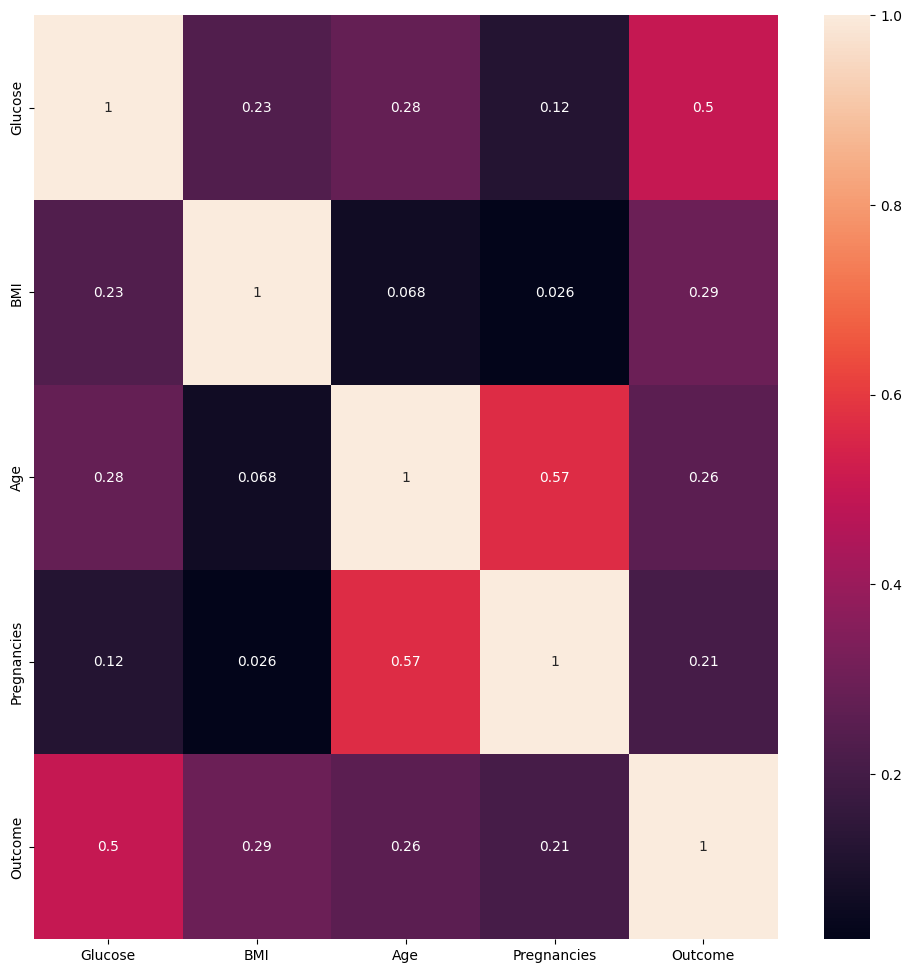

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(np.abs(cleaned.corr()), annot=True)
plt.show()

In [ ]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
X = cleaned.iloc[:,:-1]
y = cleaned.iloc[:,-1]

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X

,Glucose,BMI,Age,Pregnancies
0,0.867452,0.213589,1.532744,0.674208
1,-1.202582,-0.866052,-0.172785,-0.852774
2,2.017471,-1.375025,-0.083020,1.285001
3,-1.071151,-0.634700,-1.070431,-0.852774
4,0.506017,1.678816,0.006745,-1.158170
...,...,...,...,...
727,-0.676859,0.105625,2.699684,1.895794
728,0.013152,0.707140,-0.531843,-0.547377
729,-0.019706,-0.927745,-0.262549,0.368812
730,0.144583,-0.326231,1.263450,-0.852774


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = []
models.append( ('KNeighborsClassifier', KNeighborsClassifier()) )
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()) )
models.append( ('LogisticRegression', LogisticRegression()) )
models.append( ('SGDClassifier', SGDClassifier()) )
models.append( ('RidgeClassifier', RidgeClassifier()) )

models.append( ('RandomForestClassifier', RandomForestClassifier()) )
models.append( ('ExtraTreesClassifier', ExtraTreesClassifier()) )
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()) )
models.append( ('HistGradientBoostingClassifier', HistGradientBoostingClassifier()) )

models.append( ('XGBClassifier', XGBClassifier()) )
models.append( ('LGBMClassifier', LGBMClassifier()) )


In [167]:
from sklearn.model_selection import cross_validate,KFold
kfold = KFold(n_splits=20,shuffle=True,random_state=50)
scoring = []
for name,estimator in models:
  scor = cross_validate(estimator,X,y,cv=kfold,scoring='accuracy')
  print(f'model name : {name} score : { np.mean(scor["test_score"]) }')  

model name : KNeighborsClassifier score : 0.7376501501501501
model name : DecisionTreeClassifier score : 0.6705330330330331
model name : LogisticRegression score : 0.766403903903904
model name : SGDClassifier score : 0.741629129129129
model name : RidgeClassifier score : 0.7623123123123123
model name : RandomForestClassifier score : 0.7525525525525525
model name : ExtraTreesClassifier score : 0.7402402402402403
model name : GradientBoostingClassifier score : 0.7649024024024025
model name : HistGradientBoostingClassifier score : 0.7484609609609609
model name : XGBClassifier score : 0.7402402402402403
model name : LGBMClassifier score : 0.7443318318318318


In [ ]:
X

,Glucose,BMI,Age,Pregnancies
0,0.867452,0.213589,1.532744,0.674208
1,-1.202582,-0.866052,-0.172785,-0.852774
2,2.017471,-1.375025,-0.083020,1.285001
3,-1.071151,-0.634700,-1.070431,-0.852774
4,0.506017,1.678816,0.006745,-1.158170
...,...,...,...,...
727,-0.676859,0.105625,2.699684,1.895794
728,0.013152,0.707140,-0.531843,-0.547377
729,-0.019706,-0.927745,-0.262549,0.368812
730,0.144583,-0.326231,1.263450,-0.852774


In [ ]:
# 파라메터 튜닝
# from scipy.stats import uniform, randint
# from sklearn.model_selection import GridSearchCV
# params = {
#   'alpha' : uniform(0.001,0.0001).rvs(size=10),
#   'tol' : [None,0.0001,0.001,0.01,0.1],
#   'max_iter' : randint(1,1000).rvs(size=10)
# }
# gsc = GridSearchCV(RidgeClassifier(),param_grid = params,n_jobs = -1)
# gsc.fit(X,y)

In [ ]:
# gsc.best_score_, gsc.best_params_

In [ ]:
# gsc.best_estimator_.score(X,y)

In [ ]:
# 데이터가 0인 값을 처리 안한상태